In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


In [9]:
train_data = tf.keras.utils.image_dataset_from_directory(
    "data/train",
    image_size=(96, 96),
    batch_size=32
)

test_data = tf.keras.utils.image_dataset_from_directory(
    "data/test",
    image_size=(96, 96),
    batch_size=32
)

Found 20932 files belonging to 7 classes.
Found 5239 files belonging to 7 classes.


In [10]:
print(train_data.class_names)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


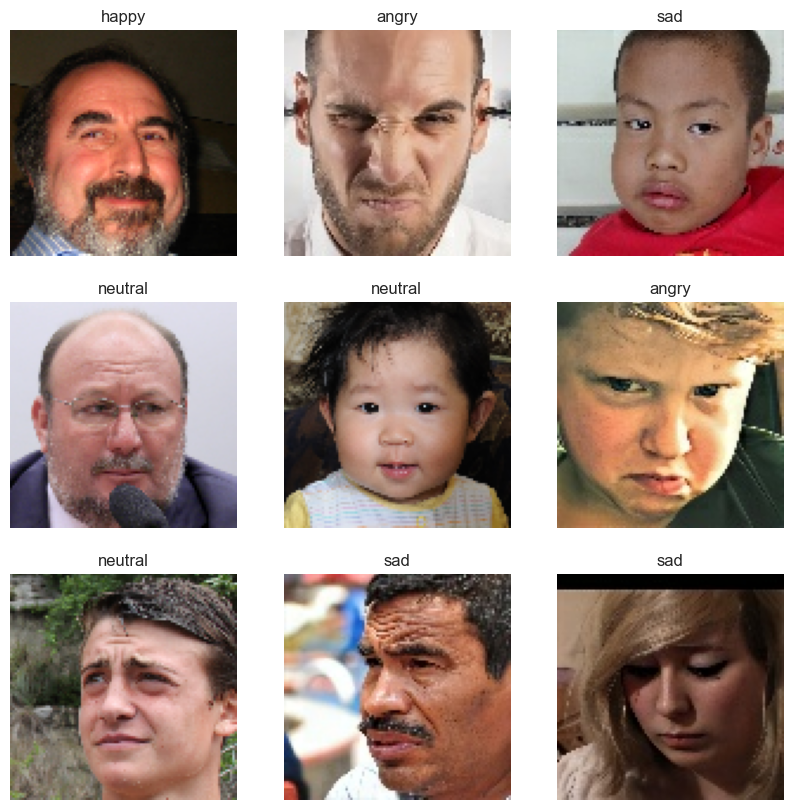

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(2):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_data.class_names[labels[i]])
        plt.axis('off')

In [12]:
for image_batch, labels_batch in train_data:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 96, 96, 3)
(32,)


In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.regularizers import l2


model = tf.keras.Sequential([
    Rescaling(1. / 255),
    
    Conv2D(64, (3, 3), activation='relu', input_shape=(96, 96, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    
    Flatten(),
    
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),
    
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    
    Dense(7, activation='softmax')
])


early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],

)
model.fit(train_data,
          validation_data=test_data,
          epochs=100,
          callbacks=[early_stopping]
          )

Epoch 1/100
655/655 ━━━━━━━━━━━━━━━━━━━━ 169s 256ms/step - accuracy: 0.2280 - loss: 2.3774 - val_accuracy: 0.3846 - val_loss: 2.0021
Epoch 2/100
655/655 ━━━━━━━━━━━━━━━━━━━━ 169s 258ms/step - accuracy: 0.4695 - loss: 1.3453 - val_accuracy: 0.4627 - val_loss: 1.9626
Epoch 3/100
655/655 ━━━━━━━━━━━━━━━━━━━━ 172s 262ms/step - accuracy: 0.5249 - loss: 1.2329 - val_accuracy: 0.4986 - val_loss: 1.9744
Epoch 4/100
655/655 ━━━━━━━━━━━━━━━━━━━━ 171s 261ms/step - accuracy: 0.5498 - loss: 1.1721 - val_accuracy: 0.5184 - val_loss: 2.6999
Epoch 5/100
655/655 ━━━━━━━━━━━━━━━━━━━━ 177s 270ms/step - accuracy: 0.5589 - loss: 1.1521 - val_accuracy: 0.5232 - val_loss: 2.0795
Epoch 6/100
655/655 ━━━━━━━━━━━━━━━━━━━━ 178s 271ms/step - accuracy: 0.5709 - loss: 1.1186 - val_accuracy: 0.5207 - val_loss: 2.4590
Epoch 7/100
655/655 ━━━━━━━━━━━━━━━━━━━━ 176s 269ms/step - accuracy: 0.5737 - loss: 1.1109 - val_accuracy: 0.5402 - val_loss: 2.4123
Epoch 8/100
655/655 ━━━━━━━━━━━━━━━━━━━━ 178s 272ms/step - accuracy: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


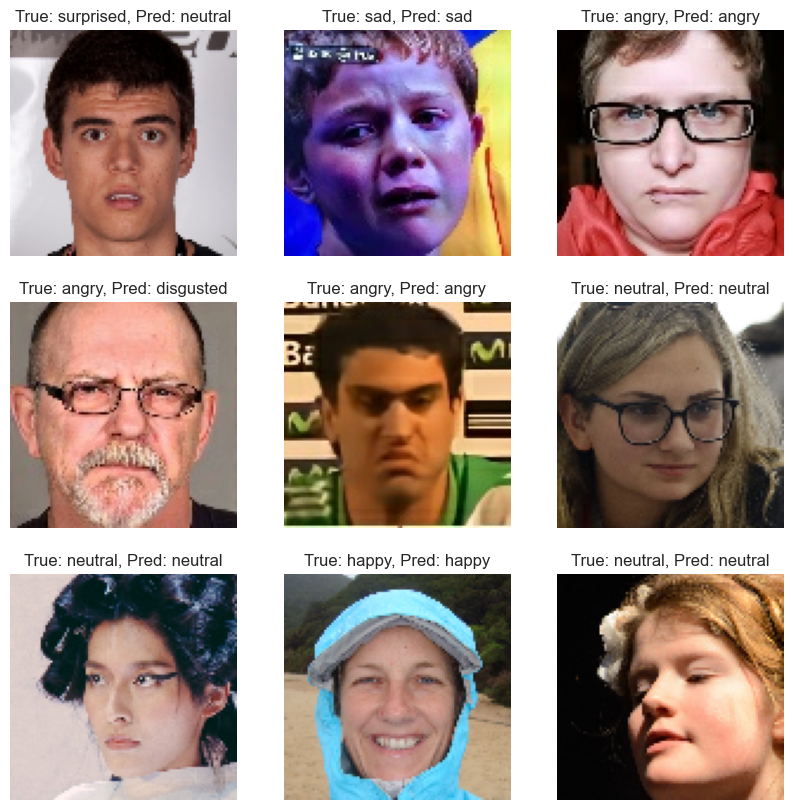

In [18]:
plt.figure(figsize=(10, 10))
for images, labels in test_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        img_array = np.expand_dims(images[i], axis=0)
        pred = np.argmax(model.predict(img_array)) 
        predicted_class_name = train_data.class_names[pred] 
        title_text = f"True: {train_data.class_names[labels[i]]}, Pred: {predicted_class_name}"
        plt.title(title_text)  
        plt.axis('off')
    break

plt.show()